In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from lib.model import build_model, FACEBOOK_2009_0, ENERGY_MODEL_WIERMAN
from lib.utils import summarize_distribution, plot_cdf

In [3]:
import logging

FORMAT = '%(levelname)s %(name)s %(asctime)-15s %(filename)s:%(lineno)d %(message)s'
logging.basicConfig(format=FORMAT)
logging.getLogger().setLevel(logging.INFO)

In [4]:
TIME_SLOT_LENGTH = 10 * 60
NORMALIZED_SWITCHING_COST = 1
REVENUE_LOSS = 0.1

# Model

In [5]:
model = build_model(
  FACEBOOK_2009_0,
  ENERGY_MODEL_WIERMAN,
  TIME_SLOT_LENGTH,
  NORMALIZED_SWITCHING_COST,
  REVENUE_LOSS,
)

# Inputs

In [6]:
inp = [[1], [5], [10], [3], [1], [10], [10], [3]]
online_inp = [[[[1]]], [[[5]]], [[[10]]], [[[3]]], [[[1]]], [[[10]]], [[[10]]], [[[3]]]]

# Execute

## Offline

In [7]:
from lib.offline import evaluate_1d

opt, iopt, _, _ = evaluate_1d(model, inp)

INFO soco.bindings.data_center.offline 2021-07-29 09:25:01,700 offline.rs:83 Graph Search
INFO soco.streaming.offline 2021-07-29 09:25:01,702 offline.rs:40 Generated a problem instance: SimplifiedSmoothedConvexOptimization { d: 1, t_end: 8, bounds: [600], switching_cost: [6.0] }
INFO soco.streaming.offline 2021-07-29 09:25:01,707 offline.rs:42 Simulating until time slot 8.
DEBUG soco.algorithms.offline.multi_dimensional.optimal_graph_search 2021-07-29 09:25:01,710 optimal_graph_search.rs:46 starting with `600` values
DEBUG soco.algorithms.offline.multi_dimensional.graph_search 2021-07-29 09:25:01,712 graph_search.rs:58 from time slot `1` to time slot `8`
INFO soco.streaming.offline 2021-07-29 09:25:05,803 offline.rs:49 Completed with Cost { cost: 21076.0, output: Success(DataCenterModelOutputSuccess { energy_cost: 18000.0, revenue_loss: 2998.0, assignments: [[[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]]] }) } and Schedule([Config([1]), Config([3]), Config([7]), Config([2]), Config([1]

In [8]:
from lib.offline import evaluate_static

opts, iopts, _, _ = evaluate_static(model, inp)

INFO soco.bindings.data_center.offline 2021-07-29 09:25:10,148 offline.rs:130 Convex Program
INFO soco.streaming.offline 2021-07-29 09:25:10,151 offline.rs:40 Generated a problem instance: SmoothedConvexOptimization { d: 1, t_end: 8, bounds: [(0.0, 600.0)] }
INFO soco.streaming.offline 2021-07-29 09:25:10,155 offline.rs:42 Simulating until time slot 8.
INFO soco.streaming.offline 2021-07-29 09:25:13,001 offline.rs:49 Completed with Cost { cost: 29552.038022393408, output: Success(DataCenterModelOutputSuccess { energy_cost: 26751.3228, revenue_loss: 2755.443026393409, assignments: [[[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]]] }) } and Schedule([Config([0.7427349999999999]), Config([3.392366]), Config([5.938256]), Config([5.938243]), Config([5.938254]), Config([7.544988]), Config([7.545343]), Config([7.5453529999999995])])
INFO soco.bindings.data_center.offline 2021-07-29 09:25:13,002 offline.rs:147 Static Integral
INFO soco.streaming.offline 2021-07-29 09:25:13,003 offline.rs:40 Gene

### Approximation algorithm

In [9]:
# from lib.utils import plot
# import numpy as np
# import matplotlib.pyplot as plt
# from lib.offline import evaluate_approx_graph_search

# # plot(np.array([1,2,3,4,5]), np.array([1,2,3,4,5]), 'x axis', 'y axis', 'test')
# # plt.show()

# x, y, opt = evaluate_approx_graph_search(model, inp)
# plt.axhline(y=opt, color='r', linestyle='-')
# plot(x, y, 'gamma', 'cost', 'approx_graph_search')
# plt.show()

## Online

In [10]:
from lib.online import evaluate_randomized_probabilistic

initial_alg, alg, initial_ialg, ialg, energy_cost, revenue_loss, switching_cost, initial_runtime, runtimes = evaluate_randomized_probabilistic(model, [], online_inp)

INFO soco.streaming.online 2021-07-29 09:25:16,019 online.rs:114 Generated a problem instance: Online { p: SimplifiedSmoothedConvexOptimization { d: 1, t_end: 0, bounds: [600], switching_cost: [6.0] }, w: 0 }
INFO soco.streaming.online 2021-07-29 09:25:16,022 online.rs:116 Simulating until time slot 0.
INFO soco.streaming.online 2021-07-29 09:25:16,025 online.rs:162 [server] Running on 127.0.0.1:3449.
  0%|          | 0/8 [00:00<?, ?it/s]INFO soco.streaming.online 2021-07-29 09:25:16,039 online.rs:263 [client] Connected to 127.0.0.1:3449.
INFO soco.streaming.online 2021-07-29 09:25:16,039 online.rs:169 [server] Connection established!
INFO soco.streaming.online 2021-07-29 09:25:16,040 online.rs:268 [client] Sent: DataCenterOnlineInput { loads: [PredictedLoadProfile([[1.0]])] }
INFO soco.streaming.online 2021-07-29 09:25:16,044 online.rs:194 [server] Received: DataCenterOnlineInput { loads: [PredictedLoadProfile([[1.0]])] }
INFO soco.model.data_center.model 2021-07-29 09:25:16,046 model

In [11]:
alg

86614.0

In [12]:
opt, iopt, opts, iopts, alg, ialg, energy_cost, revenue_loss, switching_cost

(20531.663534122985,
 21076.0,
 29552.038022393408,
 32953.142857142855,
 86614.0,
 86614.0,
 73200.0,
 13030.0,
 384.0)

## Evaluation

### Competitive Ratio

In [13]:
cr = alg / opt
icr = ialg / iopt
cr, icr

(4.218557344661831, 4.109603340292275)

### Competitive Difference

In [14]:
cd = alg - opt
icd = ialg - iopt
cd, icd

(66082.33646587702, 65538.0)

### Regret

In [15]:
regret = alg - opts
iregret = ialg - iopts
regret, iregret

(57061.961977606596, 53660.857142857145)

### Cost Change

Regret relative to overall cost.

In [16]:
rel_regret = regret / opts
rel_iregret = iregret / iopts
rel_regret, rel_iregret

(1.9308976908586546, 1.6283987653464662)

Competitive difference relative to overall cost.

In [17]:
rel_cd = cd / opt
rel_icd = icd / iopt
rel_cd, rel_icd

(3.2185573446618307, 3.1096033402922756)

### Fractional vs Integral

In [18]:
opt_vs_iopt = iopt / opt
opts_vs_iopts = iopts / opts
alg_vs_ialg = ialg / alg
opt_vs_iopt, opts_vs_iopts, alg_vs_ialg

(1.0265120488153503, 1.1150886728073448, 1.0)

### Opt vs OptS

In [21]:
opt_vs_opts = opts / opt
opt_vs_opts

1.4393396800643474

### Runtime

DEBUG matplotlib.font_manager 2021-07-29 09:25:27,443 font_manager.py:1329 findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG matplotlib.font_manager 2021-07-29 09:25:27,444 font_manager.py:1341 findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG matplotlib.font_manager 2021-07-29 09:25:27,445 font_manager.py:1341 findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG matplotlib.font_manager 2021-07-29 09:25:27,446 font_manager.py:1341 findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG matplotlib.font_manager 2021-07-29 09:25:27,448 font_manager.py:1341 findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG matplotlib.font_manager 2021-07-29 09:25:27,451 font_manager.py:1341 findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal

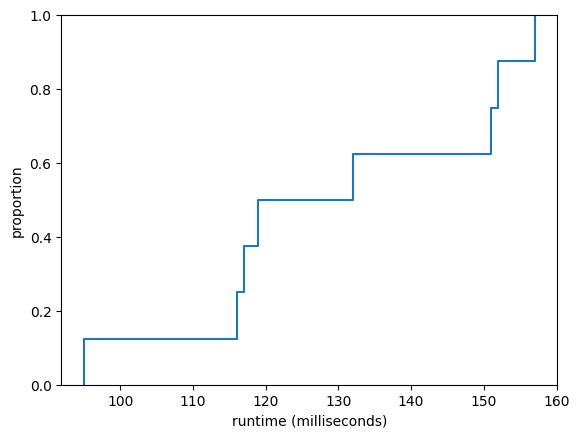

In [19]:
runtimes_np = np.array(runtimes)
plot_cdf(runtimes_np, 'runtime (milliseconds)', 'online_runtime')
plt.show()
summary = summarize_distribution(runtimes_np)

### Model

Proportion of energy cost to delay cost

In [20]:
ec_vs_rl = energy_cost / revenue_loss if revenue_loss > 0 else np.Inf
hc_vs_sc = (energy_cost + revenue_loss) / switching_cost
ec_vs_rl, hc_vs_sc

(5.617805065234076, 224.55729166666666)